### Importing needed packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from xgboost import XGBRegressor
from sklearn import metrics
%matplotlib inline

### Reading data

In [3]:
data_frame = pd.read_csv('house_price.csv')
data_frame['Price'].astype(int)
data_frame

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1850000000,61666.67
1,60,1,True,True,True,Shahran,1850000000,61666.67
2,79,2,True,True,True,Pardis,550000000,18333.33
3,95,2,True,True,True,Shahrake Qods,902500000,30083.33
4,123,2,True,True,True,Shahrake Gharb,7000000000,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3500000000,116666.67
3475,83,2,True,True,True,Niavaran,6800000000,226666.67
3476,75,2,False,False,False,Parand,365000000,12166.67
3477,105,2,True,True,True,Dorous,5600000000,186666.67


### Checking for missing values

In [4]:
data_frame.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

### Delete rows whit null vlause in address column

In [5]:
data_frame.dropna(subset=['Address'], inplace=True)

### Make plot larger

In [7]:
plt.rcParams['figure.figsize'] = [20, 10]

### Prepare Area column

In [8]:
# conver area column to numeric
data_frame['Area'] = pd.to_numeric(data_frame['Area'], errors='coerce')

# delete rows whit NAN value in Area column
data_frame.dropna(subset=['Area'], inplace=True)

### Correlation 

In [9]:
# correlation = data_frame.corr()

Text(0, 0.5, 'Price')

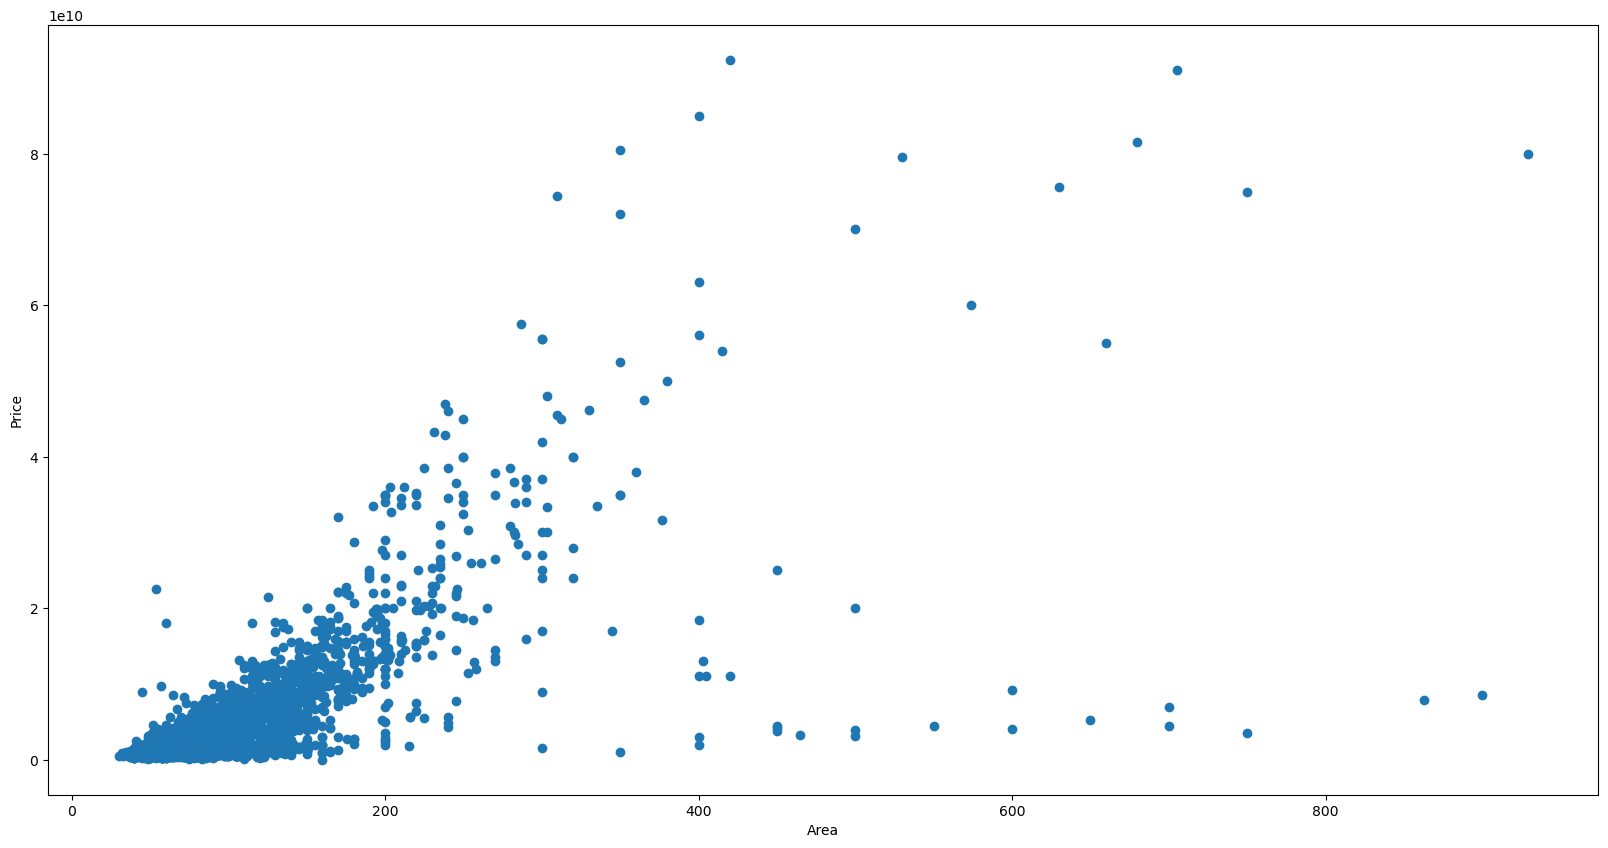

In [10]:
plt.scatter(data_frame.Area, data_frame.Price)
plt.xlabel('Area')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

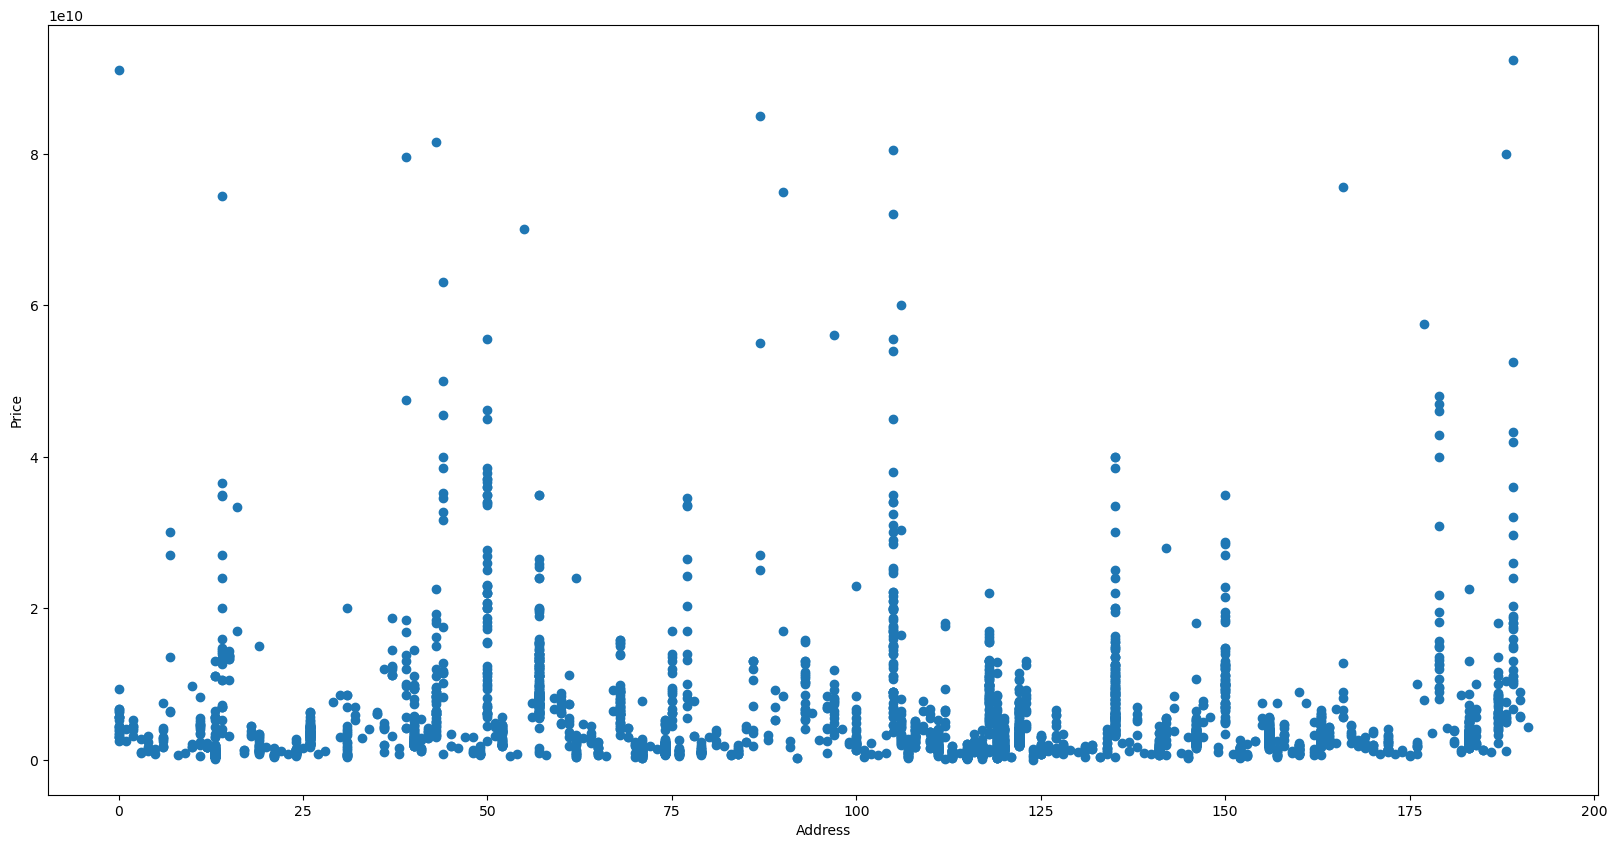

In [11]:
# encode address 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_frame['Address'] = le.fit_transform(data_frame['Address'])

#  plot address and price
plt.scatter(data_frame.Address, data_frame.Price)
plt.xlabel('Address') 
plt.ylabel('Price')

### Correlation 

<Axes: >

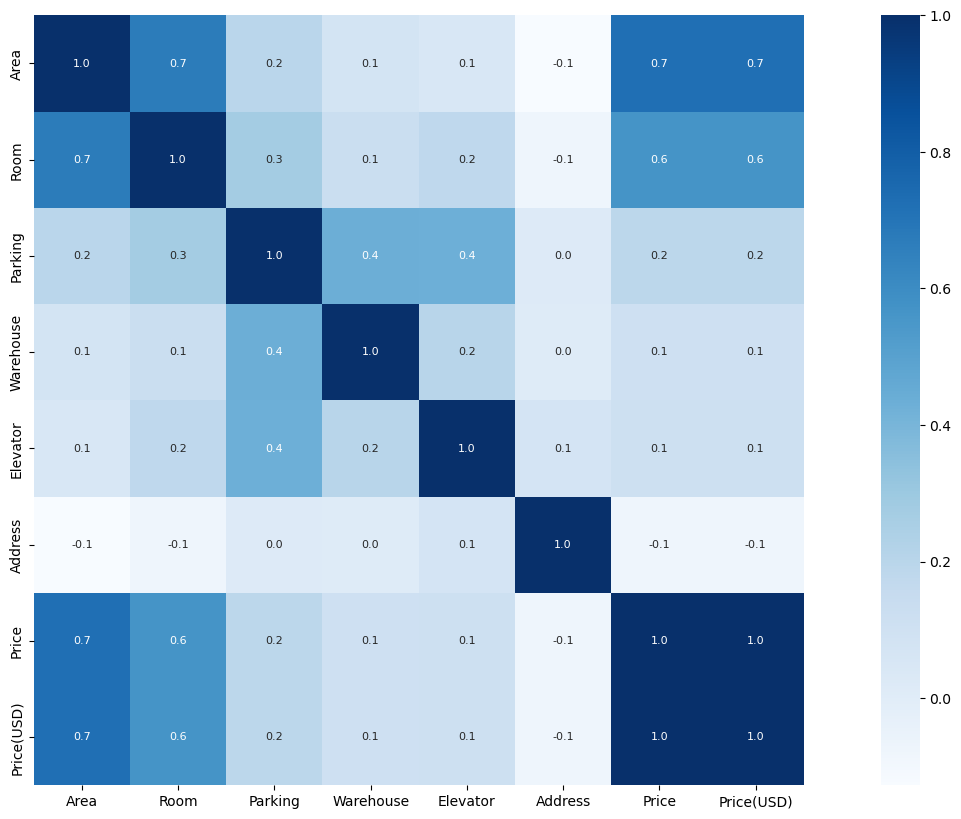

In [12]:
correlation = data_frame.corr()

# plot correlation
sns.heatmap(correlation, 
            cbar = True, square = True, 
            fmt = '.1f', annot = True, 
            annot_kws = {'size':8}, cmap = "Blues")

# Model Training 


* Multiple Linear Regression

### Splitting data into Train and Test

In [58]:
msk = np.random.rand(len(data_frame)) < 0.8
train = data_frame[msk]
test = data_frame[~msk]

### Training model with Multiple Linear Regression 

In [56]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

x = np.asanyarray(train[['Area', 'Room', 'Address']])
y = np.asanyarray(train[['Price']])

# training
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[7.79724535e+07 1.31098092e+09 2.56833191e+06]]


### Evaluation Multiple Linear Regressor
* prediction on test data

In [53]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[['Area', 'Room', 'Address']])
test_y = np.asanyarray(test[['Price']])

test_y_ = regr.predict(test[['Area', 'Room', 'Address']])

print("Residual sum of squares: %.2f"
      % np.mean((test_y_ - test_x) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(test_x, test_y))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Residual sum of squares: 66552903046877773824.00
Variance score: 0.44
R2-score: 0.44


/Users/alireza/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# Model Training 
* XGBoost Regressor

#### Creating train and test dataset

In [20]:
X = data_frame.drop(['Price'], axis = 1)
Y = data_frame['Price']

# splitting the data into training data and test data 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [21]:
# loading the model
model = XGBRegressor()

# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluation XGBoost Regressor
* prediction on training data

In [22]:
training_data_prediction = model.predict(X_train)

# R squared error 
score_1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error:", score_1)

# mean absolute error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean absolute error:", score_2)

R squared error: 0.9999893865748544
Mean absolute error: 14255251.094565218
